# IBM Q Øvelse 3: Måling af to (sammenfiltrede) qubits
### Skrevet af Anna Liv Paludan Bjerregaard

I denne opgave skal vi undersøge fænomenet *sammenfiltring*, som sker når målingen af én qubit, påvirker målingen af en anden! Vi starter igen med at lave et kredsløb.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble

from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-11-14 12:56:19,995: Credentials are already in use. The existing account in the session will be replaced.


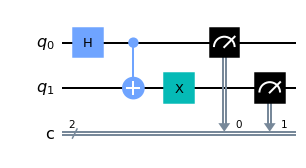

In [6]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

**Opgave:** Vis at qubits'ne er i tilstanden
$$\frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)\:.$$
Er denne tilstand sammenfiltret?

*Hint: linjen mellem $q_0$ og $q_1$ er en CNOT operator (definition 13 i noterne).*

Nu måler vi først på $q_0$ og derefter $q_1$. Hvis målingen af $q_0$ giver $0$, hvad giver målingen af $q_1$ så?

In [12]:
sim = True
N_measure = 1024

{'|00>': 0, '|10>': 496, '|01>': 528, '|11>': 0}


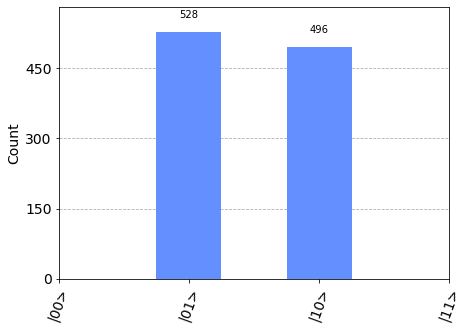

In [13]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

**Opgave:** Forklar histogrammet ovenfor. Husk at IBM Q sætter resultatet for $q_0$ til højre og $q_1$ til venstre

Lad os prøve med et andet kredsløb!

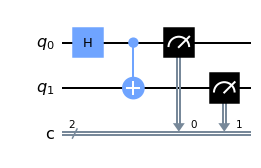

In [14]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

**Opgave:** Hvilken tilstand er qubits'ne i inden målingen? Er de sammenfiltrede?

In [15]:
sim = True
N_measure = 1024

{'|00>': 500, '|10>': 0, '|01>': 0, '|11>': 524}


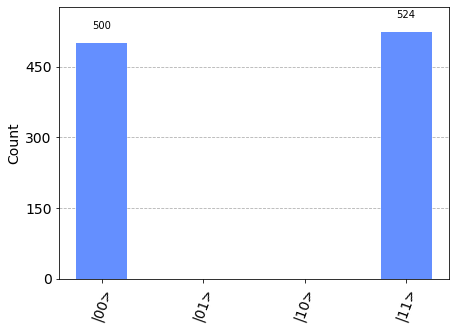

In [19]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)

**Opgave:** Forklar histogrammet udfra tilstanden af qubits'ne.

Nu har du målt på sammenfiltrede qubits og har derfor et rigtig godt grundlag for at lære hvordan man kan bruge kvantecomputere til at løse problemer! Det vil vi fortsætte med i den næste opgave der handler om Grovers algoritme.

**Ekstra opgave:** Nu laver vi et kredsløb meget magen til det første i denne opgave, bortset fra at qubits'ne kommer i tilstanden
$$\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)$$
inden målingen foretages. Vil resultatet af målingen være anderledes? Hvorfor/hvorfor ikke?

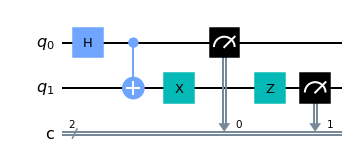

In [22]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.z(1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

In [23]:
sim = True
N_measure = 1024

{'|00>': 0, '|10>': 515, '|01>': 509, '|11>': 0}


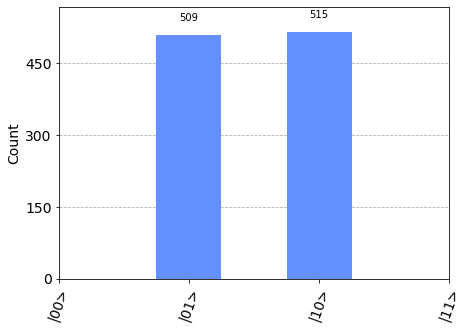

In [24]:
if sim:
    simulator = Aer.get_backend('aer_simulator')
    Nmeasure = N_measure #Amount of times the circuit is run
    result = simulator.run(circuit, shots=Nmeasure).result() 
    device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code
else:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
    n=3
    IBMQ.load_account()
    provider = IBMQ.get_provider(hub='ibm-q')
    backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                       not x.configuration().simulator and x.status().operational==True))
    #Finds the least busy quantum computer on the IBM Q network
    print("least busy backend: ", backend)

# Execute and monitor the job
    from qiskit.tools.monitor import job_monitor
    shots = 1024
    transpiled_circ = transpile(circuit, backend, optimization_level=3) 
    qobj = assemble(transpiled_circ, shots=shots)
    job = backend.run(qobj) #Send circuit to the quantum computer
    job_monitor(job, interval=2)
    device_counts = job.result().get_counts()

possible_measurements = ['00','10','01','11']
measurement_names = ['|00>','|10>','|01>','|11>']

for name, measurement in zip(measurement_names, possible_measurements):
    try:
        device_counts[name] = device_counts.pop(measurement)
    except:
        device_counts[name] = 0

print(device_counts)
plot_histogram(device_counts)